In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


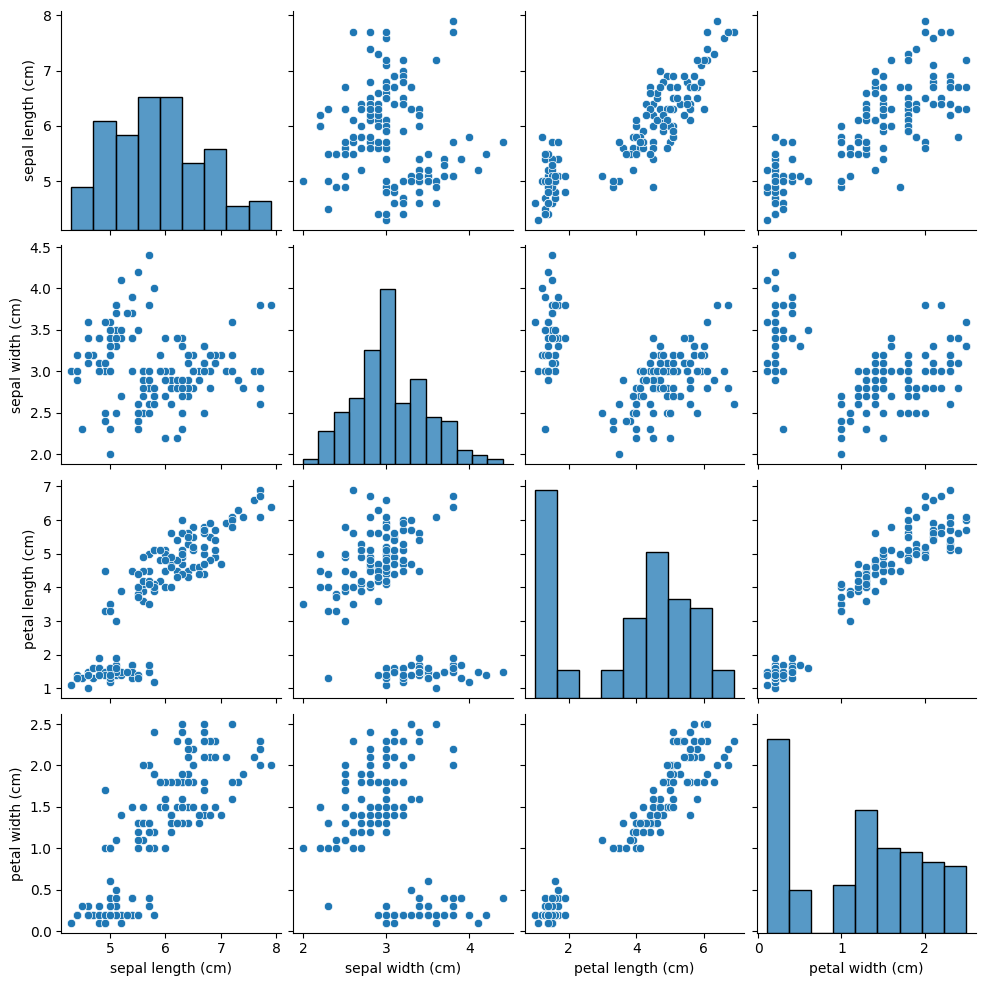

In [4]:
sns.pairplot(data=df)
plt.show()

In [11]:
from sklearn.cluster import KMeans
wscc = []
for i in range(2,21):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wscc.append(km.inertia_)

In [6]:
for i in wscc:
    print(i, end=",  ")

152.34795176035792,  78.85144142614602,  57.38387326549491,  46.712301930501944,  39.03998724608725,  37.39662121212121,  35.917798784548786,  28.677305194805196,  26.545888139466314,  26.272986087341124,  24.50975702075702,  22.605441644749042,  21.50139174138555,  19.476211661145875,  18.69846869577791,  19.64172727272728,  16.734599927849928,  16.818380536130537,  15.759778093853175,  

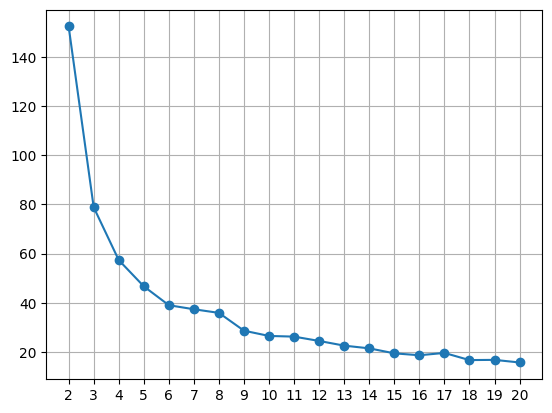

In [7]:
plt.plot([i for i in range(2,21)], wscc, marker='o')
plt.xticks([i for i in range(2,21)])
plt.grid(visible=True)
plt.show()

In [8]:
kmn = KMeans(n_clusters=3)
df['target'] = kmn.fit_predict(df)

# silhouette score

In [9]:
from sklearn.metrics import silhouette_score
ss = []
no_c = [j for j in range(2,21)]

for i in range(2,21):
    kn = KMeans(n_clusters=i)
    kn.fit(df)
    ss.append(silhouette_score(df, kn.labels_))

In [10]:
for i in ss:
    print(i, end=" ")

0.620302648507893 0.68468524942902 0.5764650670952602 0.4432641683546697 0.5011467539665011 0.48697520838590197 0.3708525564356408 0.3115685439177106 0.3243455354879057 0.3135558669794138 0.2910706444150527 0.23807748333695475 0.295379615855791 0.3010401171270512 0.2741284258256844 0.29131130750893985 0.2833051981205308 0.2842761017717502 0.26244733320786723 

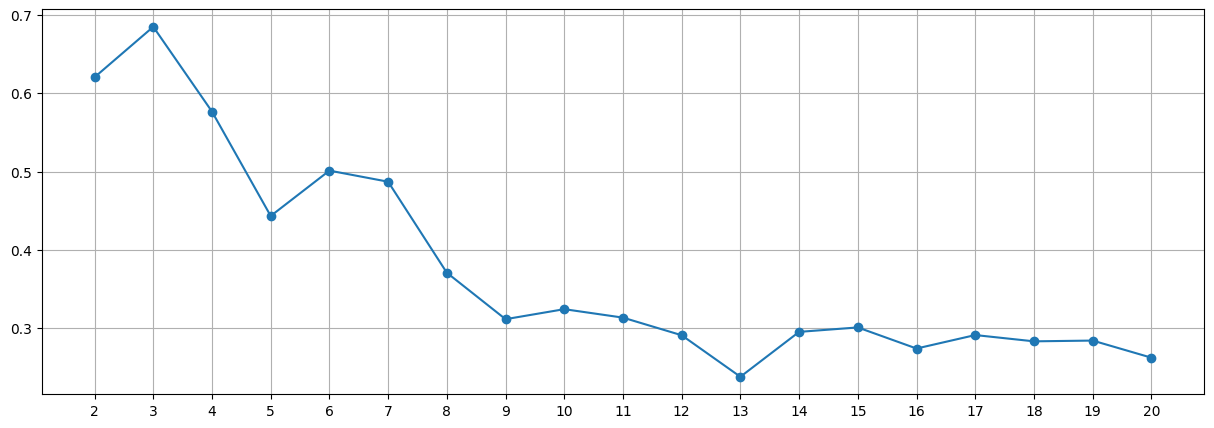

In [16]:
plt.figure(figsize=(15,5))
plt.plot(no_c, ss, marker = 'o')
plt.xticks([i for i in range(2,21)])
plt.grid(visible=True)
plt.show()

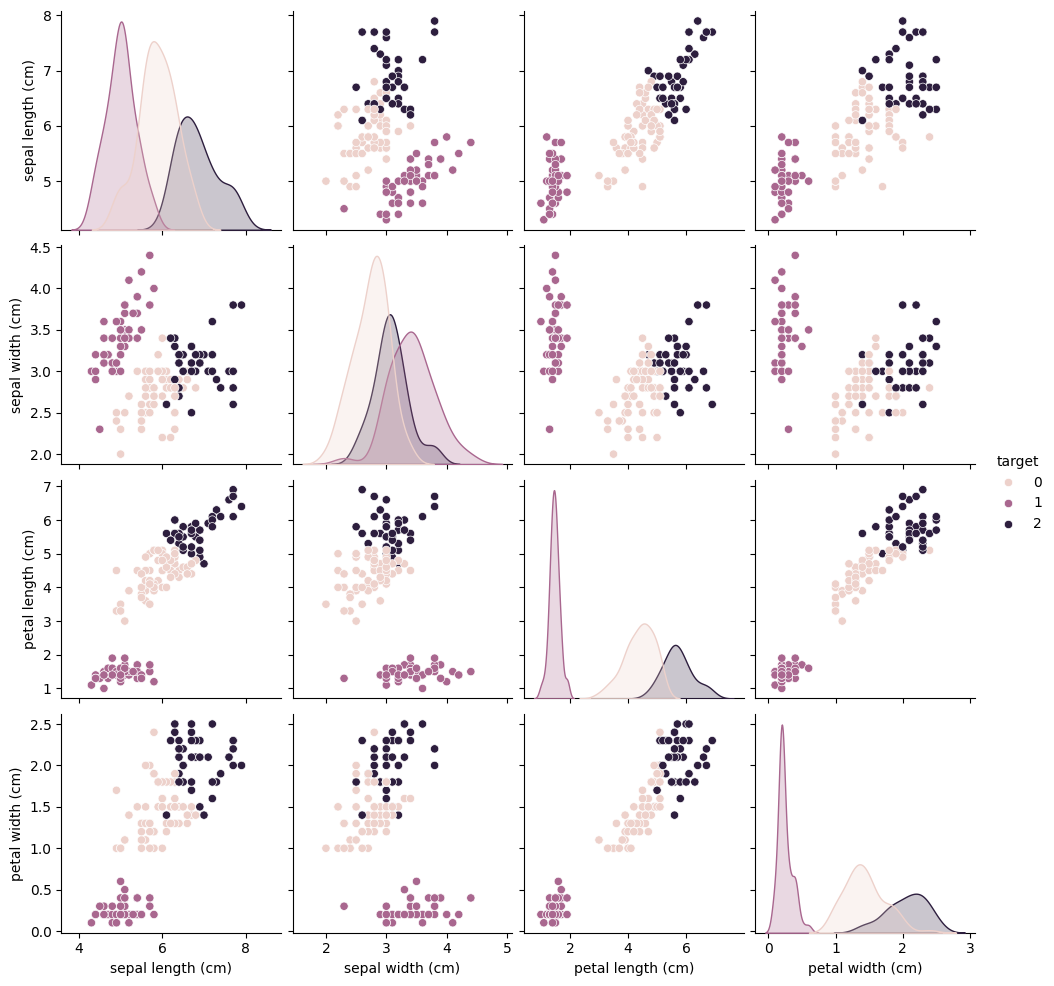

In [17]:
sns.pairplot(data=df, hue='target')
plt.show()